In [4]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [6]:
x_train = np.array([1.0, 2.0]) # square / features
y_train = np.array([300.0, 500.0]) # price / target

**Definitions**

Linear function that describe the data: $ f_w,_b(x) = {w * x + b} $, where *w* and *b* calls **model parameters**

Our task is to find such *w* and *b* in order to describe the data as "accurately as possible".
Accurately as possible means that Cost function is minimal

Cost function: $ J = { 1 \over 2m } { \sum_{i=1}^m (f(x^i) - y^i)^2 } $

To find minimum of the cost function we use method wich call **gradient descent**. The essence of the method is to simultaneously change the parameters *w* and *b* in order to approach the local minimum of the function

Simultaneously change the parameters *w* and *b* can describe like this:

$$ w = w - \alpha * \frac{d{J_w,_b(x)}}{dw} $$
$$ b = b - \alpha * \frac{d{J_w,_b(x)}}{db} $$,
where $\alpha$ -- learning rate


In [1]:
# Function to calculate the Cost
def compute_cost(x, y, w, b):
    m = x.size
    
    f_x = w * x + b
    
    t_j = (f_x - y) ** 2
        
    j = t_j.sum() / (2 * m)
    
    return j

In [2]:
def compute_gradient(x, y, w, b):
    m = x.size
    
    f_x = w * x + b
    
    dj_dw = ((f_x - y) * x).sum()
    dj_db = (f_x - y).sum()
        
    return dj_dw / m, dj_db / m

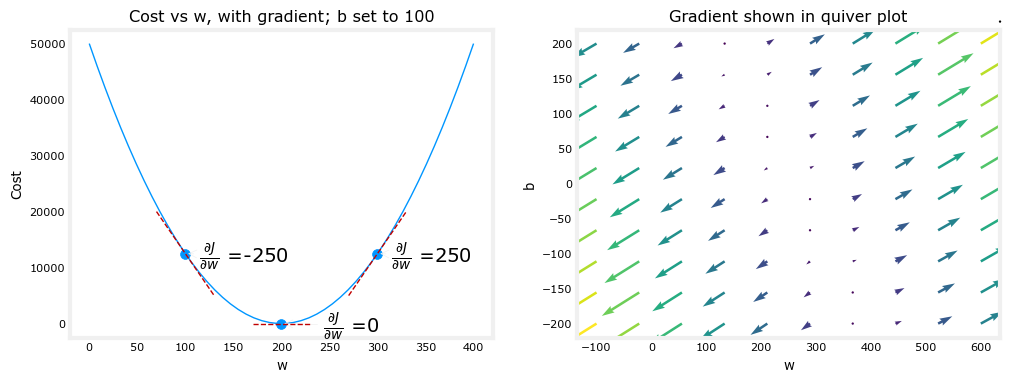

In [7]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [15]:
def gradient_descent(x, y, w_init, b_init, num_iter, alpha):
    w = w_init
    b = b_init
    p_history = []
    J_history = []
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        p_history.append([w, b])
        J_history.append( compute_cost(x, y, w , b))
        
        if i % 1000 == 0:
            cost = compute_cost(x, y, w, b)
            
            print('W: ', w, 'B: ', b, 'COST: ', cost)
    return w, b, J_history, p_history

In [28]:
# initialize parameters
w_init = 10
b_init = 10

# gradient descent settings
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, iterations, alpha)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

W:  16.1 B:  13.75 COST:  69785.60625
W:  194.09202534841114 B:  109.55930379094337 COST:  4.606163362946697
W:  197.15220019480228 B:  104.60783687796535 COST:  1.0702395648950676
W:  198.6272852866246 B:  102.2210990630985 COST:  0.2486695837757099
W:  199.33831525626283 B:  101.070628405204 COST:  0.05777824323026921
W:  199.68105047915014 B:  100.51607116543055 COST:  0.013424743549613295
W:  199.84625790784335 B:  100.248759930611 COST:  0.0031192318993561704
W:  199.92589225142038 B:  100.11990885603169 COST:  0.0007247518439395537
W:  199.96427810808032 B:  100.05779923526855 COST:  0.00016839569876150856
W:  199.98278110471867 B:  100.02786075781393 COST:  3.9126649484997784e-05
(w,b) found by gradient descent: (199.9917,100.0134)


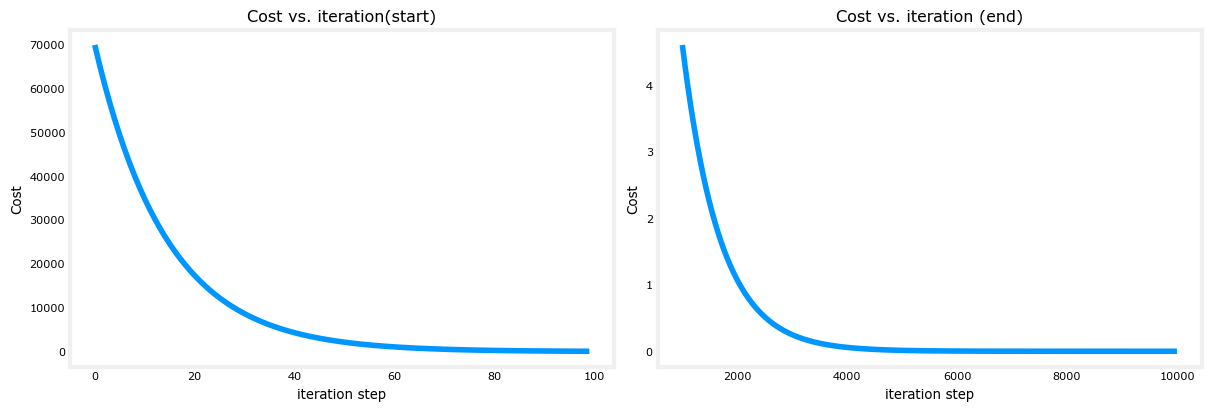

In [13]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Plotting

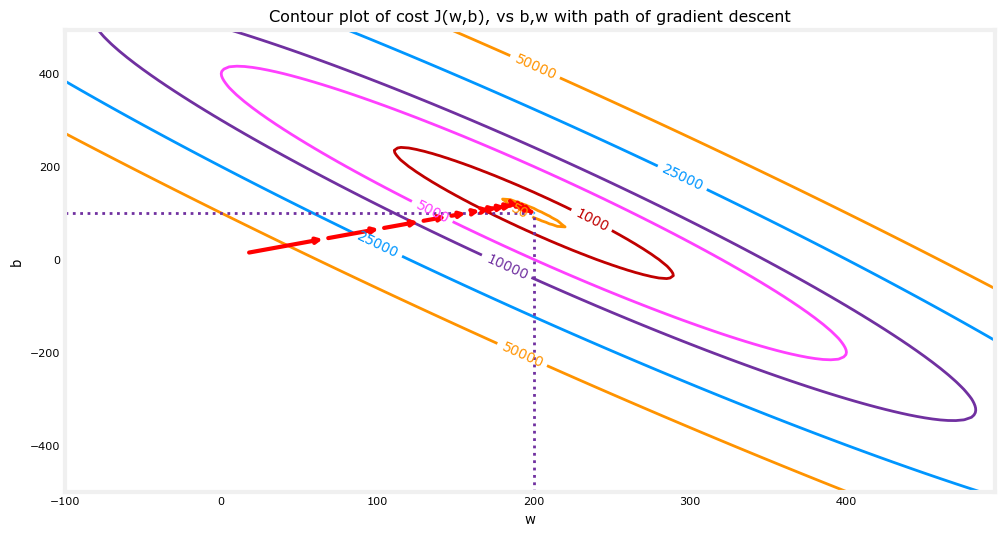

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

### Increased Learning Rate

In [26]:
# initialize parameters
w_init = 10
b_init = 10

# gradient descent settings
iterations = 10
alpha = 8.0e-1

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, iterations, alpha)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

W:  498.0 B:  310.0 COST:  226925.0
(w,b) found by gradient descent: (-45447.9842,-28096.9735)


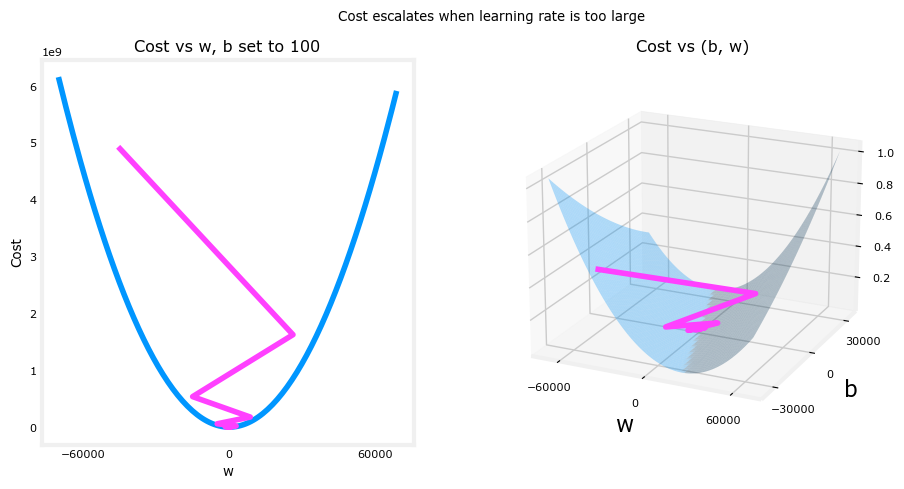

In [27]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()